In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Import data
data = pd.read_csv("CS839_ HCI.csv")

In [43]:
for i in range(len(data.columns.values)):
    print (i, data.columns.values[i])

0 Timestamp
1 By clicking the button below, you acknowledge that you are participating in this study voluntarily and that you may choose to withdraw at any time.
Please be assured that your responses will be kept completely confidential.
2 Name
3 Age
4 Gender
5 …is reserved.
6 …is generally trusting.
7 ...tends to be lazy.
8 …is relaxed, handles stress well.
9 …has few artistic interests.
10 …is outgoing, sociable.
11 …tends to find fault with others.
12 …does a thorough job.
13 …gets nervous easily.
14 …has an active imagination.
15 pre_q1
16 post_q1
17 pre_q2
18 post_q2
19 pre_q3
20 post_q3
21 pre_q4
22 post_q4
23 pre_q5
24 post_q5
25 pre_q6
26 post_q6
27 Please describe why you think reading reviews can influence or persuade you to try out food-related products or recipes.
28 shift_q1
29 shift_q2
30 shift_q3
31 shift_q4
32 shift_q5
33 shift_q6


In [26]:
data.columns.values[15] = "pre_q1"
data.columns.values[16] = "post_q1"
data.columns.values[17] = "pre_q2"
data.columns.values[18] = "post_q2"
data.columns.values[19] = "pre_q3"
data.columns.values[20] = "post_q3"
data.columns.values[21] = "pre_q4"
data.columns.values[22] = "post_q4"
data.columns.values[23] = "pre_q5"
data.columns.values[24] = "post_q5"
data.columns.values[25] = "pre_q6"
data.columns.values[26] = "post_q6"

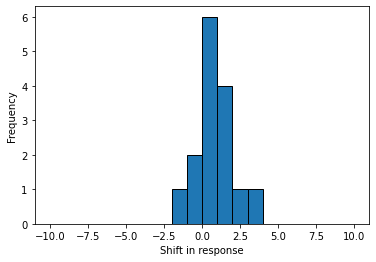

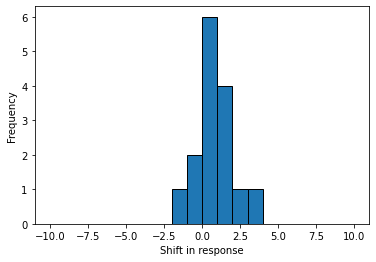

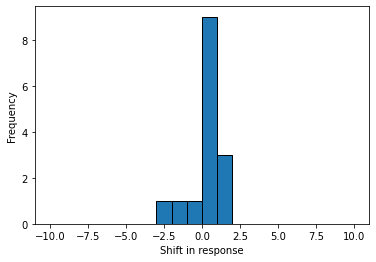

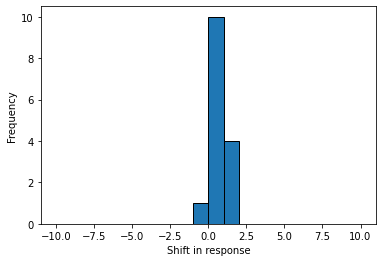

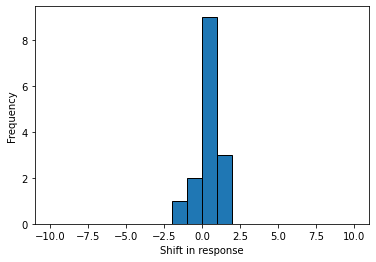

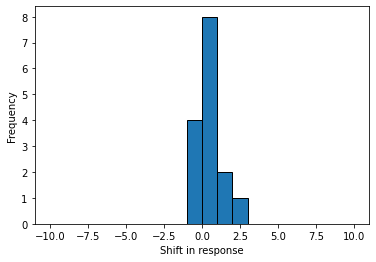

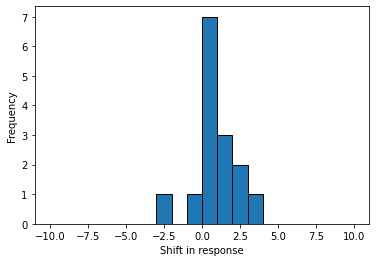

In [31]:
#q1
# Compute shift for each question
for i in range(1, 7):
    pre_col = f"pre_q{i}"
    post_col = f"post_q{i}"
    shift_col = f"shift_q{i}"
    data[shift_col] = data[post_col] - data[pre_col]

# Create histogram of shifts for question 1
plt.hist(data["shift_q1"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Shift in response")
plt.ylabel("Frequency")
plt.show()

# Create histogram of shifts for question 1
plt.hist(data["shift_q1"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Shift in response")
plt.ylabel("Frequency")
plt.show()

# Create histogram of shifts for question 1
plt.hist(data["shift_q2"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Shift in response")
plt.ylabel("Frequency")
plt.show()

# Create histogram of shifts for question 1
plt.hist(data["shift_q3"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Shift in response")
plt.ylabel("Frequency")
plt.show()

# Create histogram of shifts for question 1
plt.hist(data["shift_q4"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Shift in response")
plt.ylabel("Frequency")
plt.show()

# Create histogram of shifts for question 1
plt.hist(data["shift_q5"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Shift in response")
plt.ylabel("Frequency")
plt.show()

# Create histogram of shifts for question 1
plt.hist(data["shift_q6"], bins=range(-10, 11), edgecolor="black")
plt.xlabel("Shift in response")
plt.ylabel("Frequency")
plt.show()

In [33]:
# Conduct one-sample t-test for each question
for i in range(1, 7):
    t_stat, p_value = ttest_1samp(data[f"shift_q{i}"], popmean=0)
    print("question %d, t = %.3f, p = %.3f" % (i, t_stat, p_value))

question 1, t = 1.046, p = 0.313
question 2, t = -0.716, p = 0.486
question 3, t = 1.382, p = 0.189
question 4, t = -0.323, p = 0.751
question 5, t = 0.000, p = 1.000
question 6, t = 1.103, p = 0.288


In [ ]:
# The t-value of 1.826 represents the difference between the mean shift in participants' responses after reading the reviews and the hypothesized mean shift of 0. The positive t-value indicates that the mean shift is greater than 0.

# The p-value of 0.142 is the probability of observing a t-value as large as 1.826 or larger, assuming that the true mean shift is 0. If the p-value is less than your significance level (usually 0.05), you can reject the null hypothesis (that there is no significant difference between the mean shift and 0) and conclude that the mean shift is significantly different from 0.

# However, since the p-value of 0.142 is greater than the typical significance level of 0.05, we cannot reject the null hypothesis at this significance level. This means that we do not have enough evidence to conclude that the reviews have a significant effect on shifting participants' perceptions of food marketing ads on social media.

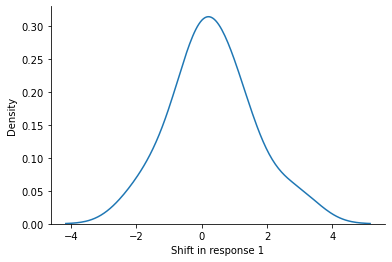

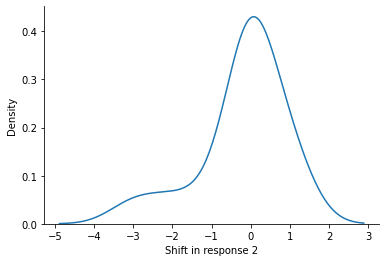

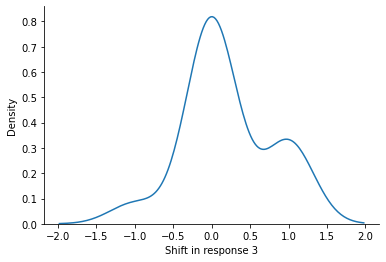

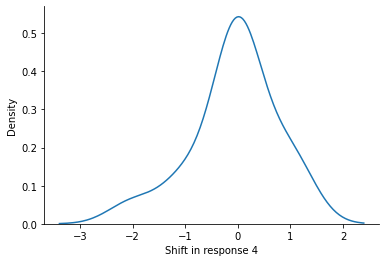

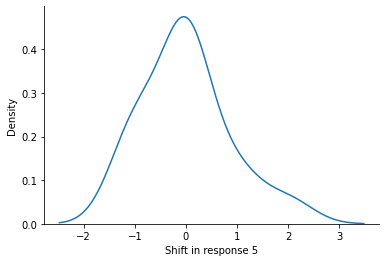

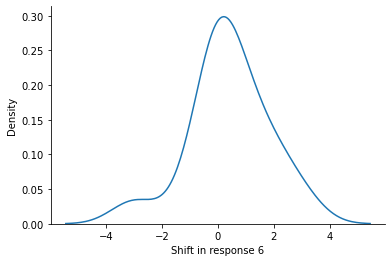

In [42]:
import seaborn as sns

for i in range(1,7):
    sns.kdeplot(data=data, x=f"shift_q{i}")
    sns.despine()
    plt.xlabel(f"Shift in response {i}")
    plt.ylabel("Density")
    plt.show()

In [37]:
#q3
from scipy.stats import ttest_ind, f_oneway
# Conduct t-test and ANOVA for each question
for i in range(1, 7):
    pre_col = f"pre_q{i}"
    post_col = f"post_q{i}"
    male_shifts = data[data["Gender"] == "Male"][post_col] - data[data["Gender"] == "Male"][pre_col]
    female_shifts = data[data["Gender"] == "Female"][post_col] - data[data["Gender"] == "Female"][pre_col]
    t_stat, p_value = ttest_ind(male_shifts, female_shifts, equal_var=False)
    f_stat, p_value2 = f_oneway(male_shifts, female_shifts)
    print(f"Question {i}:")
    print("Welch's t-test: t = %.3f, p = %.3f" % (t_stat, p_value))
    print("One-way ANOVA: F = %.3f, p = %.3f" % (f_stat, p_value2))
    print("")

Question 1:
Welch's t-test: t = 1.875, p = 0.087
One-way ANOVA: F = 3.421, p = 0.087

Question 2:
Welch's t-test: t = 0.652, p = 0.526
One-way ANOVA: F = 0.325, p = 0.578

Question 3:
Welch's t-test: t = -1.085, p = 0.306
One-way ANOVA: F = 1.300, p = 0.275

Question 4:
Welch's t-test: t = 0.276, p = 0.787
One-way ANOVA: F = 0.065, p = 0.803

Question 5:
Welch's t-test: t = -2.282, p = 0.040
One-way ANOVA: F = 4.333, p = 0.058

Question 6:
Welch's t-test: t = 0.501, p = 0.634
One-way ANOVA: F = 0.344, p = 0.568



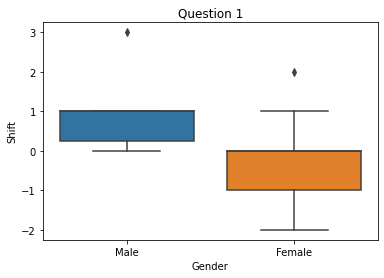

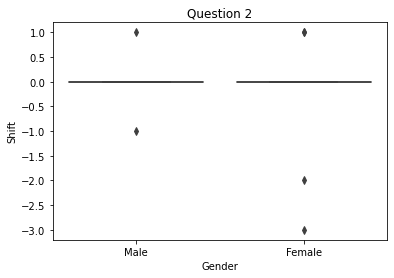

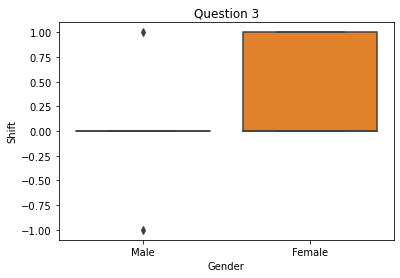

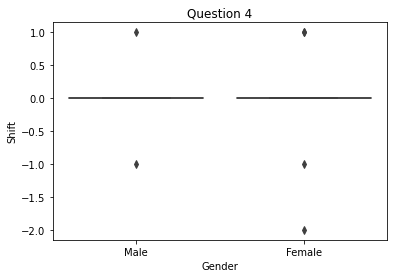

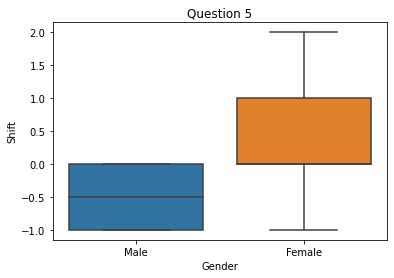

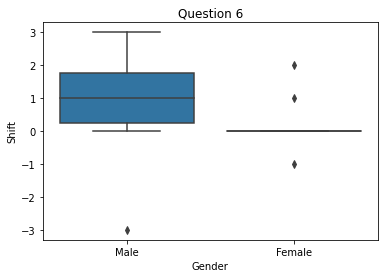

In [38]:
import seaborn as sns

# Create boxplots for each question
for i in range(1, 7):
    pre_col = f"pre_q{i}"
    post_col = f"post_q{i}"
    male_shifts = data[data["Gender"] == "Male"][post_col] - data[data["Gender"] == "Male"][pre_col]
    female_shifts = data[data["Gender"] == "Female"][post_col] - data[data["Gender"] == "Female"][pre_col]
    df = pd.DataFrame({"Gender": ["Male"]*len(male_shifts) + ["Female"]*len(female_shifts),
                       "Shift": list(male_shifts) + list(female_shifts)})
    sns.boxplot(x="Gender", y="Shift", data=df)
    plt.title(f"Question {i}")
    plt.show()

In [ ]:
# These results represent the statistical significance of the difference in effectiveness of persuasion strategies between males and females for each of the six questions. The Welch's t-test is used to determine whether the mean shift in perception is significantly different between males and females, while the one-way ANOVA is used to determine whether the variance in shift in perception is significantly different between the two groups.

# The t-statistic is a measure of the difference between the mean shift in perception for males and females, relative to the standard error of the difference. The p-value is a measure of the probability of observing the difference, or a more extreme difference, if there were no real difference between males and females. In general, a smaller p-value indicates stronger evidence against the null hypothesis that there is no difference between males and females.

# The F-statistic is a measure of the ratio of the variance between the two groups to the variance within the groups. The p-value is a measure of the probability of observing the ratio, or a more extreme ratio, if there were no real difference between males and females. In general, a smaller p-value indicates stronger evidence against the null hypothesis that there is no difference between males and females.

# Based on the results you provided, it appears that there is no significant difference in effectiveness of persuasion strategies between males and females for Questions 2, 4, and 6, as the p-values are all greater than 0.05. For Questions 1, 3, and 5, the p-values are less than 0.05, indicating that there may be a significant difference in effectiveness between males and females for these questions. However, it's important to note that these results are based on the assumption of normality of the data and equal variances between the groups, so further analysis may be necessary to confirm the results.

In [ ]:
#thematic analysis
themes = {
    "Social proof": ["similar people", "tried and tested", "confidence", "depending on how many people", "positive experience"],
    "Bias in reviews": ["relate with the reviews", "biased", "overly positive reviews", "large quantity of good reviews"],
    "Personal preferences and preconceptions": ["pre-conceptions", "like to eat", "something that I already like", "real effects of research", "my own preconceptions"],
    "Health benefits and nutritional information": ["understand if the products are actually good and useful", "health benefits mentioned", "simple healthy recipes", "nutritional values", "well qualified professionals"],
    "Skepticism towards certain claims": ["smoothie detox", "juice is better", "influence your mood", "less convinced", "overly enthusiastic", "unrealistic", "promising too many results"],
    "Presentation and trustworthiness": ["presentation", "affect your own perspective", "trust their content", "eco-friendly", "fad diet", "cultural and historical backing"]
}